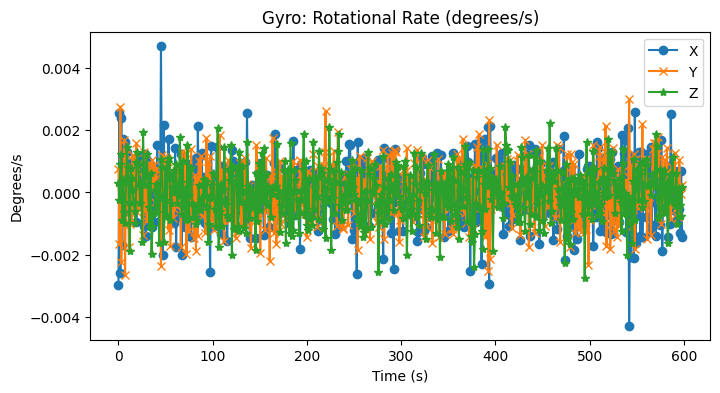

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.transform import Rotation as R

data = pd.read_csv("./imu.csv")

df = pd.DataFrame(data)

# Normalize time
df["time"] = df["timestamp"] - df["timestamp"].iloc[0]

# Convert quaternions to Euler angles
quaternions = df[["orientation_w", "orientation_x", "orientation_y", "orientation_z"]].to_numpy()
eulers = R.from_quat(quaternions).as_euler('xyz', degrees=True)

# Separating the plots into individual figures for clarity

# Gyroscopic data plot
plt.figure(figsize=(8, 4))
plt.plot(df["time"], df["angular_velocity_x"], 'o-', label='X')
plt.plot(df["time"], df["angular_velocity_y"], 'x-', label='Y')
plt.plot(df["time"], df["angular_velocity_z"], '*-', label='Z')
plt.title('Gyro: Rotational Rate (degrees/s)')
plt.xlabel('Time (s)')
plt.ylabel('Degrees/s')
plt.legend()
plt.show()


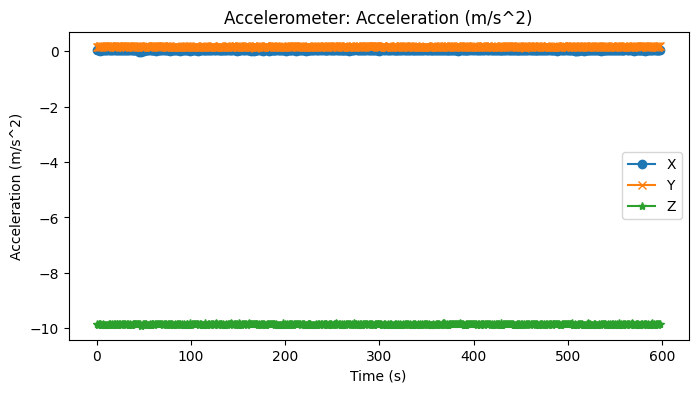

In [4]:


# Accelerometer data plot
plt.figure(figsize=(8, 4))
plt.plot(df["time"], df["linear_acceleration_x"], 'o-', label='X')
plt.plot(df["time"], df["linear_acceleration_y"], 'x-', label='Y')
plt.plot(df["time"], df["linear_acceleration_z"], '*-', label='Z')
plt.title('Accelerometer: Acceleration (m/s^2)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()



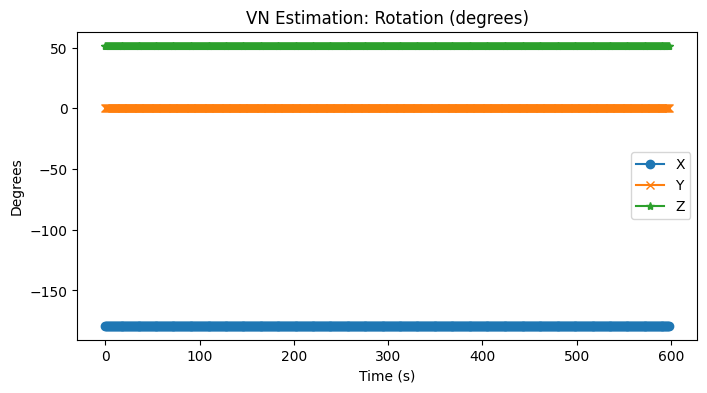

In [5]:


# VN estimation (Euler angles) plot
plt.figure(figsize=(8, 4))
plt.plot(df["time"], eulers[:, 0], 'o-', label='X')
plt.plot(df["time"], eulers[:, 1], 'x-', label='Y')
plt.plot(df["time"], eulers[:, 2], '*-', label='Z')
plt.title('VN Estimation: Rotation (degrees)')
plt.xlabel('Time (s)')
plt.ylabel('Degrees')
plt.legend()
plt.show()



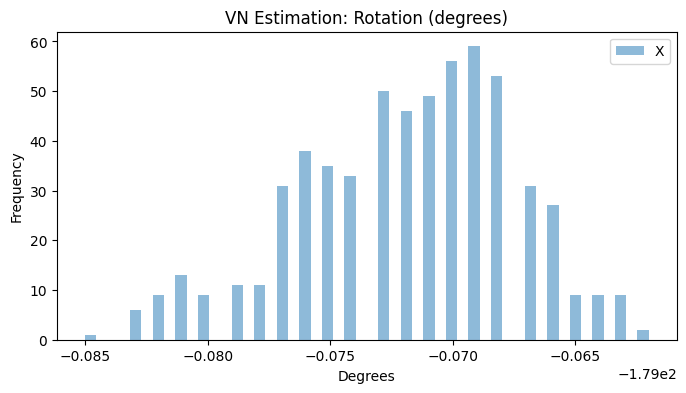

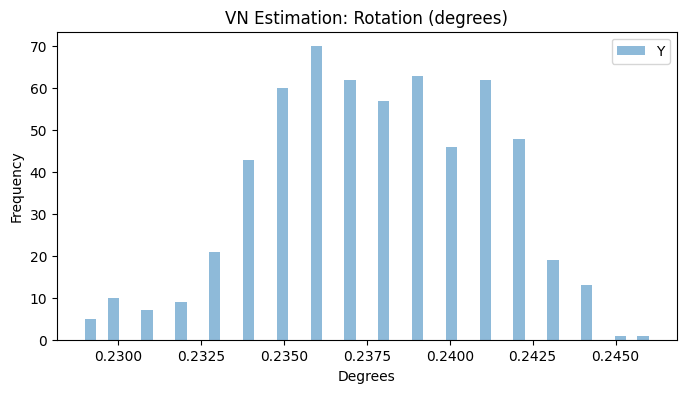

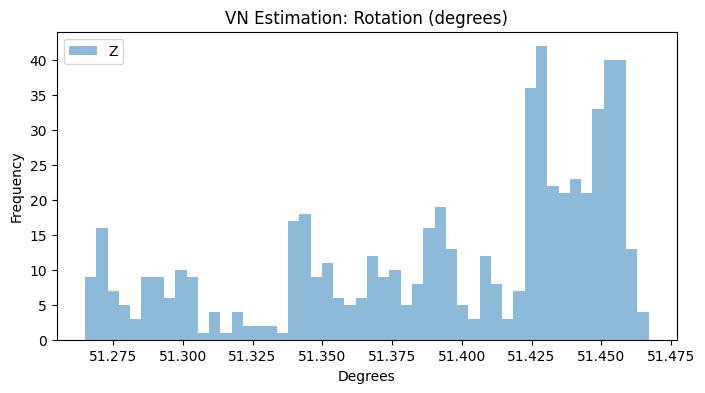

In [9]:


# Histograms for rotation (Euler angles) in three separate figures
plt.figure(figsize=(8, 4))
plt.hist(eulers[:, 0], bins=50, alpha=0.5, label='X')
plt.title('VN Estimation: Rotation (degrees)')
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(eulers[:, 1], bins=50, alpha=0.5, label='Y')
plt.title('VN Estimation: Rotation (degrees)')
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(eulers[:, 2], bins=50, alpha=0.5, label='Z')
plt.title('VN Estimation: Rotation (degrees)')
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.legend()
plt.show()

